# IRIS Dataset - Project 1
> Name: Sharun Garg  
Student ID: 200493338

## Importing important libraries and Models

In [1]:
# importing the important libraries and packages before starting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 1. Reading the csv file of data as Pandas Dataframe

In [2]:
# loading the iris dataset
file = "iris-dataset.csv"
data = pd.read_csv(file)

## 2. Printing a sample of random rows from the IRIS dataframe sample

In [3]:
data.sample(7)

,sepal.length,sepal.width,petal.length,petal.width,variety
101,5.8,2.7,5.1,1.9,Virginica
50,7.0,3.2,4.7,1.4,Versicolor
117,7.7,3.8,6.7,2.2,Virginica
79,5.7,2.6,3.5,1.0,Versicolor
107,7.3,2.9,6.3,1.8,Virginica
2,4.7,3.2,1.3,0.2,Setosa
25,5.0,3.0,1.6,0.2,Setosa


### Explaination of the columns in dataset

> - **sepal.length** (float) - length of the flower sepal in cms.
> - **sepal.width** (float) - width of the flower sepal in cms.
> - **petal.length** (float) - length of the flower petal in cms.
> - **petal.width** (float) - width of the flower petal in cms.
> - **variety** (object) - variety of the flower.

## 3. Getting info of the data points

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


> ### Observation:  
It can be seen that there are no **null** values for any data entry and our data is complete.

### Checking for the different types of variety in dataset

In [5]:
data["variety"].value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

> There are 3 different type of Varieties and the data entry points are 50 each.

### Encoding the variety Variable
> As the variety variable in of type "object" we will need to encode the values to an integer for prediction analysis.

In [6]:
variety_mapper = {'Virginica': 2, 'Versicolor': 1, 'Setosa': 0}
data["variety_encoded"] = data['variety'].map(variety_mapper)
data.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_encoded
92,5.8,2.6,4.0,1.2,Versicolor,1
20,5.4,3.4,1.7,0.2,Setosa,0
43,5.0,3.5,1.6,0.6,Setosa,0
26,5.0,3.4,1.6,0.4,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [7]:
# Helper function to separate the data into features and labels.
def get_features_and_labels():
    data_copy = data.copy()
    features = data_copy.drop(['variety', 'variety_encoded'], axis = 1)
    labels = data_copy['variety_encoded']
    return {'features': features, 'labels': labels}

### Separating the data into features and labels.

In [8]:
data1 = get_features_and_labels()
features1 = data1['features']
labels1 = data1['labels']

## 4. Data Analysis
> We will now plot the values of all the 4 lengths for the against each **Variety** and observe if there are any distinctions.

In [9]:
# Helper function to plot histograms
def histogram(variable):
    sns.distplot(a=data[data['variety'] == 'Setosa'][variable], label="Setosa", kde=False)
    sns.distplot(a=data[data['variety'] == 'Virginica'][variable], label="Virginica", kde=False)
    sns.distplot(a=data[data['variety'] == 'Versicolor'][variable], label="Versicolor", kde=False)
    
    var = variable.split(".")
    plt.title(f"Histogram of {var[0].capitalize()} {var[1].capitalize()}, by Species")
    plt.ylabel("Number of flowers")
    
    plt.legend()
    plt.show()
    
# Helper function to plot scatter plots
def scatter(col1, col2):
    columns = features1.columns.values
    formatter = plt.FuncFormatter(lambda i, *args: data['variety'].unique()[int(i)])
    plt.figure(figsize=(5, 4))
    plt.scatter(features1.values[:, col1], features1.values[:, col2], c=labels1.values)
    
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    
    col1 = columns[col1].split(".")
    col2 = columns[col2].split(".")
    plt.xlabel(f"{col1[0].capitalize()} {col1[1].capitalize()}")
    plt.ylabel(f"{col2[0].capitalize()} {col2[1].capitalize()}")
    
    plt.tight_layout()
    plt.show()
    

### Plotting different data points for each flower variety.

#### Sepal Length

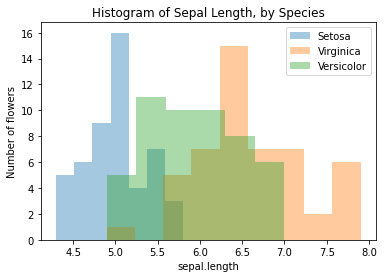

In [10]:
histogram('sepal.length')

> **Observation**:
It can be observed that the Sepal Lengths are not Unique to any flower type. Setosa have comparatively smaller sepals as compared to Verginica, and Versicolor has a strong overlap with both the other two flower types.

#### Sepal Width

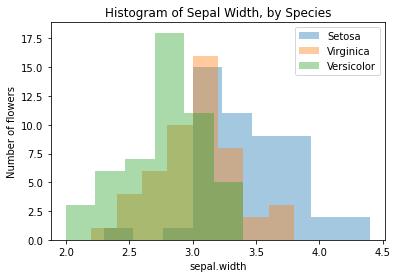

In [11]:
histogram('sepal.width')

> **Observation**:
Similar to Sepal Length, Sepal Widths are also not Unique to any flower type and there's a very strong overlap for values.

#### Petal Length

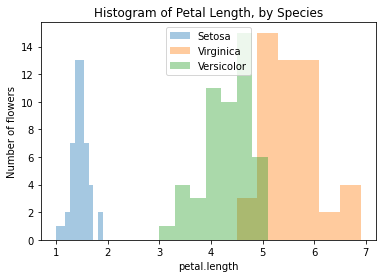

In [12]:
histogram('petal.length')

> **Observation**:
It can be observed that the Petal Lengths for Setosa are smaller as compared to other two flower types with all the values under 2 cms and this can be a basis for separation. Versicolor Petals are smaller in length against Versicolor, but the data points is very close for a clear separation.

#### Petal Width

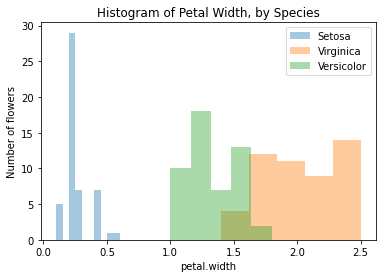

In [13]:
histogram('petal.width')

> **Observation**:
Similar to Petal Length, Petal Widths for Setosa are smaller as compared to other two flower types. Petal Widths for Versicolor and Virginica are again very closely related.

### Result:
> Sepals for all the flowers are very closely related and cannot be clearly separated. Petals on the other hand can distinct Setosa from other two flower categories.

### Plotting the Sepals Size

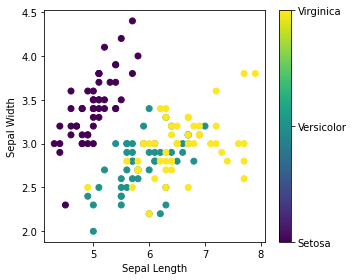

In [14]:
scatter(0,1)

> **Observation**:
As observed earlier, Sepals for Setosa are smaller and for Versicolor and Verginica, there's no clear distinction.

### Plotting the Petals Size

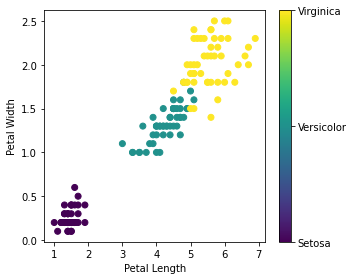

In [15]:
scatter(2,3)

> **Observation**:
As observed earlier, Petals for Setosa are smaller and can be easily distinguished from other two flower types. For Versicolor, the Petals are smaller than Virginica and can be separated, with few errors.

### Result:  
>As the data is not clearly separatable in 2 dimensions, we will **raise the data to higher dimensions** in our Classifiers to build a model that can separate Versicolor from Virginica.

## 5. K-Fold Cross Validation
> Checking the cross-validation score for **5 fold** Data for 3 Classifiers:
> - Random Forest Classifier
> - Support Vector Classifier
> - Gradient Boosting Classifier

In [16]:
# Baseline Performance on 5-Fold
rf = RandomForestClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
models = [rf, svc, gbc]

for model in models:
    scores = cross_val_score(model, features1, labels1, cv = 5)
    with np.printoptions(precision=4):
        print(f"Cross Validation Score of {type(model).__name__} model \nscores: {scores} \n=> {round(np.mean(scores), 2)} (+/-{round(np.std(scores)*2, 2)})\n")


Cross Validation Score of RandomForestClassifier model 
scores: [0.9667 0.9667 0.9333 0.9    1.    ] 
=> 0.95 (+/-0.07)

Cross Validation Score of SVC model 
scores: [0.9667 0.9667 0.9667 0.9333 1.    ] 
=> 0.97 (+/-0.04)

Cross Validation Score of GradientBoostingClassifier model 
scores: [0.9667 0.9667 0.9    0.9667 1.    ] 
=> 0.96 (+/-0.07)



### Result:
> All the 3 models performed well with baseline parameters with accuracy over 95%. Further we will tune the parameters for these models to find the best one.

## 6. Building Classifiers with 60% split ratio data
> Separating the data into 60-20-20 ratio with 60% Training set, and 20% each for Validation set and Test set.

### Helper Functions

In [17]:
def train_val_test_split(split_ratio, input_data):
    input_features = input_data['features']
    input_labels = input_data['labels']
    x_train, x_rem, y_train, y_rem = train_test_split(input_features, input_labels, train_size=split_ratio)
    x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, test_size=0.5)
    return {'training' : {'features': x_train, 'labels': y_train}, 
            'validation': {'features': x_val, 'labels': y_val},
            'test': {'features': x_test, 'labels': y_test}
           }
        
def tune_hyperparameters(model, input_params, training_data):
    cv = GridSearchCV(model, input_params, cv=5)
    cv.fit(training_data['features'], training_data['labels'])
    print(f"Best Estimator for {type(model).__name__}: ", cv.best_estimator_, "\n")
    model_results(cv)
    
def model_results(results):
    print(f"Best Parameters: {results.best_params_}\n")
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, param in zip(means, stds, results.cv_results_['params']):
        print(f"{round(mean, 3)} (+/- {round(std*2, 3)}) for {param}")
        
def model_test_val_performance(model, training_set, check_set):
    model.fit(training_set['features'], training_set['labels']) # fitting on training set
    label_pred = model.predict(check_set['features']) # predicting on set other than training set
    label_true = check_set['labels']
    acc = round(accuracy_score(label_true, label_pred), 3)
    prc = round(precision_score(label_true, label_pred, average='micro'), 3)
    rcl = round(recall_score(label_true, label_pred, average='micro'), 3)
    return({'acc': acc, 'prc': prc, 'rcl': rcl})

### Splitting the data

In [18]:
data2 = train_val_test_split(split_ratio = 0.6, input_data = data1)
data2_training = data2['training']
data2_validation = data2['validation']
data2_test = data2['test']

### 6 A. Support Vector Classifier

In [19]:
svc_parameters = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C' : [0.01, 0.1, 1, 10, 100]
    }

tune_hyperparameters(model = SVC(), input_params = svc_parameters, training_data = data2_training)

Best Estimator for SVC:  SVC(C=1, kernel='linear') 

Best Parameters: {'C': 1, 'kernel': 'linear'}

0.722 (+/- 0.0) for {'C': 0.01, 'kernel': 'linear'}
0.911 (+/- 0.181) for {'C': 0.01, 'kernel': 'poly'}
0.389 (+/- 0.0) for {'C': 0.01, 'kernel': 'rbf'}
0.389 (+/- 0.0) for {'C': 0.01, 'kernel': 'sigmoid'}
0.967 (+/- 0.089) for {'C': 0.1, 'kernel': 'linear'}
0.967 (+/- 0.054) for {'C': 0.1, 'kernel': 'poly'}
0.722 (+/- 0.0) for {'C': 0.1, 'kernel': 'rbf'}
0.389 (+/- 0.0) for {'C': 0.1, 'kernel': 'sigmoid'}
0.978 (+/- 0.054) for {'C': 1, 'kernel': 'linear'}
0.967 (+/- 0.089) for {'C': 1, 'kernel': 'poly'}
0.967 (+/- 0.089) for {'C': 1, 'kernel': 'rbf'}
0.389 (+/- 0.0) for {'C': 1, 'kernel': 'sigmoid'}
0.967 (+/- 0.089) for {'C': 10, 'kernel': 'linear'}
0.956 (+/- 0.109) for {'C': 10, 'kernel': 'poly'}
0.978 (+/- 0.054) for {'C': 10, 'kernel': 'rbf'}
0.389 (+/- 0.0) for {'C': 10, 'kernel': 'sigmoid'}
0.956 (+/- 0.109) for {'C': 100, 'kernel': 'linear'}
0.944 (+/- 0.141) for {'C': 100, 'ker

#### Building 3 Classifiers with top accuracy
These 3 classifiers would be tested for validation set and the best one would be checked against test set.

In [20]:
svc1 = SVC(C=1, kernel='linear') #Best Estimator
svc2 = SVC(C=10, kernel='rbf')
svc3 = SVC(C=100, kernel='rbf') 

print("VALIDATION SET")
for svc_model in [svc1, svc2, svc3]:
    #performance
    prf = model_test_val_performance(model = svc_model, training_set = data2_training, check_set = data2_validation)
    print(f"C: {svc_model.C}, Kernel: {svc_model.kernel} -- Accuracy: {prf['acc']}, Precision: {prf['prc']}, Recall: {prf['rcl']}")

print("\nTEST SET ON BEST MODEL")
prf = model_test_val_performance(model = svc1, training_set = data2_training, check_set = data2_test)
print(f"C: {svc1.C}, Kernel: {svc1.kernel} -- Accuracy: {prf['acc']}, Precision: {prf['prc']}, Recall: {prf['rcl']}")


VALIDATION SET
C: 1, Kernel: linear -- Accuracy: 1.0, Precision: 1.0, Recall: 1.0
C: 10, Kernel: rbf -- Accuracy: 1.0, Precision: 1.0, Recall: 1.0
C: 100, Kernel: rbf -- Accuracy: 1.0, Precision: 1.0, Recall: 1.0

TEST SET ON BEST MODEL
C: 1, Kernel: linear -- Accuracy: 0.933, Precision: 0.933, Recall: 0.933


### Observation:
> The SupportVectorClassifier did pretty well on both Validation set and Test set with accuracy over 93%.

### 6 B. Random Forest Classifier

In [21]:
rf_parameters = {
    'n_estimators': [5, 10, 50, 100, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

tune_hyperparameters(model = RandomForestClassifier(), input_params = rf_parameters, training_data = data2_training)

Best Estimator for RandomForestClassifier:  RandomForestClassifier(max_depth=2, n_estimators=5) 

Best Parameters: {'max_depth': 2, 'n_estimators': 5}

0.956 (+/- 0.083) for {'max_depth': 2, 'n_estimators': 5}
0.933 (+/- 0.083) for {'max_depth': 2, 'n_estimators': 10}
0.922 (+/- 0.133) for {'max_depth': 2, 'n_estimators': 50}
0.944 (+/- 0.099) for {'max_depth': 2, 'n_estimators': 100}
0.944 (+/- 0.099) for {'max_depth': 2, 'n_estimators': 250}
0.944 (+/- 0.099) for {'max_depth': 4, 'n_estimators': 5}
0.944 (+/- 0.099) for {'max_depth': 4, 'n_estimators': 10}
0.944 (+/- 0.099) for {'max_depth': 4, 'n_estimators': 50}
0.944 (+/- 0.099) for {'max_depth': 4, 'n_estimators': 100}
0.944 (+/- 0.099) for {'max_depth': 4, 'n_estimators': 250}
0.933 (+/- 0.083) for {'max_depth': 8, 'n_estimators': 5}
0.944 (+/- 0.099) for {'max_depth': 8, 'n_estimators': 10}
0.956 (+/- 0.083) for {'max_depth': 8, 'n_estimators': 50}
0.944 (+/- 0.099) for {'max_depth': 8, 'n_estimators': 100}
0.944 (+/- 0.099) fo

#### Building 3 Classifiers with top accuracy
These 3 classifiers would be tested for validation set and the best one would be checked against test set.

In [22]:
rf1 = RandomForestClassifier(max_depth=2, n_estimators=5) # Best Estimator
rf2 = RandomForestClassifier(max_depth=8, n_estimators=50)
rf3 = RandomForestClassifier(max_depth=None, n_estimators=50) 

print("VALIDATION SET")
for rf_model in [rf1, rf2, rf3]:
    #performance
    prf = model_test_val_performance(model = rf_model, training_set = data2_training, check_set = data2_validation)
    print(f"max_depth: {rf_model.max_depth}, n_estimators: {rf_model.n_estimators} -- Accuracy: {prf['acc']}, Precision: {prf['prc']}, Recall: {prf['rcl']}")

print("\nTEST SET ON BEST MODEL")
prf = model_test_val_performance(model = rf1, training_set = data2_training, check_set = data2_test)
print(f"max_depth: {rf1.max_depth}, n_estimators: {rf1.n_estimators} -- Accuracy: {prf['acc']}, Precision: {prf['prc']}, Recall: {prf['rcl']}")

VALIDATION SET
max_depth: 2, n_estimators: 5 -- Accuracy: 0.933, Precision: 0.933, Recall: 0.933
max_depth: 8, n_estimators: 50 -- Accuracy: 0.967, Precision: 0.967, Recall: 0.967
max_depth: None, n_estimators: 50 -- Accuracy: 0.967, Precision: 0.967, Recall: 0.967

TEST SET ON BEST MODEL
max_depth: 2, n_estimators: 5 -- Accuracy: 0.967, Precision: 0.967, Recall: 0.967


### Observation:
> The RandomForestClassifier did pretty well on both Validation set and Test set with accuracy over 93%.

### 6 C. Gradient Boosting Classifier

In [23]:
gb_parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

tune_hyperparameters(model = GradientBoostingClassifier(), input_params = gb_parameters, training_data = data2_training)

Best Estimator for GradientBoostingClassifier:  GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250) 

Best Parameters: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.389 (+/- 0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.922 (+/- 0.133) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.967 (+/- 0.089) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.956 (+/- 0.083) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.389 (+/- 0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.956 (+/- 0.109) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.944 (+/- 0.141) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.944 (+/- 0.099) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.389 (+/- 0.0) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.956 (+/- 0.109) for {'learning_rate': 0.01, 'max_depth': 5

#### Building 3 Classifiers with top accuracy
These 3 classifiers would be tested for validation set and the best one would be checked against test set.

In [24]:
gb1 = GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250) # Best Estimator
gb2 = GradientBoostingClassifier(learning_rate=1, max_depth=7, n_estimators=250) 
gb3 = GradientBoostingClassifier(learning_rate=100, max_depth=9, n_estimators=500)  

print("VALIDATION SET")
for gb_model in [gb1, gb2, gb3]:
    #performance
    prf = model_test_val_performance(model = gb_model, training_set = data2_training, check_set = data2_validation)
    print(f"learning_rate: {gb_model.learning_rate}, max_depth: {gb_model.max_depth}, n_estimators: {gb_model.n_estimators} -- Accuracy: {prf['acc']}, Precision: {prf['prc']}, Recall: {prf['rcl']}")

print("\nTEST SET ON BEST MODEL")
prf = model_test_val_performance(model = gb1, training_set = data2_training, check_set = data2_test)
print(f"learning_rate: {gb1.learning_rate}, max_depth: {gb1.max_depth}, n_estimators: {gb1.n_estimators} -- Accuracy: {prf['acc']}, Precision: {prf['prc']}, Recall: {prf['rcl']}")

VALIDATION SET
learning_rate: 0.01, max_depth: 1, n_estimators: 250 -- Accuracy: 0.967, Precision: 0.967, Recall: 0.967
learning_rate: 1, max_depth: 7, n_estimators: 250 -- Accuracy: 0.967, Precision: 0.967, Recall: 0.967
learning_rate: 100, max_depth: 9, n_estimators: 500 -- Accuracy: 0.933, Precision: 0.933, Recall: 0.933

TEST SET ON BEST MODEL
learning_rate: 0.01, max_depth: 1, n_estimators: 250 -- Accuracy: 0.933, Precision: 0.933, Recall: 0.933


### Observation:
> The GradientBoostingClassifier did pretty well on both Validation set and Test set with accuracy over 93%.

### 6 D. Testing the best hyperparametrized classifiers on
- Accuracy
- Precision
- Recall
- Latency

In [26]:
for mdl in [svc1, rf1, gb1]:
    val_features = data2_validation['features']
    start = time()
    prediction = mdl.predict(val_features)
    end = time()
    val_label_true = data2_validation['labels']
    acc = round(accuracy_score(val_label_true, prediction), 3)
    prc = round(precision_score(val_label_true, prediction, average='micro'), 3)
    rcl = round(recall_score(val_label_true, prediction, average='micro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(type(mdl).__name__,
                                                                                   acc,
                                                                                   prc,
                                                                                   rcl,
                                                                                   round((end - start)*1000, 1)))

SVC -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.9ms
RandomForestClassifier -- Accuracy: 0.967 / Precision: 0.967 / Recall: 0.967 / Latency: 3.6ms
GradientBoostingClassifier -- Accuracy: 0.967 / Precision: 0.967 / Recall: 0.967 / Latency: 2.0ms


### Result: 
> The best classifier with best performance is : **SUPPORT VECTOR CLASSIFIER**

## 7. Building Classifiers with 80% split ratio data
> Separating the data into 80-10-10 ratio with 80% Training set, and 10% each for Validation set and Test set.

### Splitting the data

In [27]:
data3 = train_val_test_split(split_ratio = 0.8, input_data = data1)
data3_training = data3['training']
data3_validation = data3['validation']
data3_test = data3['test']

### 7 A. Support Vector Classifier

In [28]:
svc_parameters = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C' : [0.01, 0.1, 1, 10, 100]
    }

tune_hyperparameters(model = SVC(), input_params = svc_parameters, training_data = data3_training)

Best Estimator for SVC:  SVC(C=1, kernel='linear') 

Best Parameters: {'C': 1, 'kernel': 'linear'}

0.883 (+/- 0.143) for {'C': 0.01, 'kernel': 'linear'}
0.892 (+/- 0.041) for {'C': 0.01, 'kernel': 'poly'}
0.367 (+/- 0.033) for {'C': 0.01, 'kernel': 'rbf'}
0.367 (+/- 0.033) for {'C': 0.01, 'kernel': 'sigmoid'}
0.967 (+/- 0.033) for {'C': 0.1, 'kernel': 'linear'}
0.95 (+/- 0.097) for {'C': 0.1, 'kernel': 'poly'}
0.833 (+/- 0.118) for {'C': 0.1, 'kernel': 'rbf'}
0.367 (+/- 0.033) for {'C': 0.1, 'kernel': 'sigmoid'}
0.992 (+/- 0.033) for {'C': 1, 'kernel': 'linear'}
0.958 (+/- 0.053) for {'C': 1, 'kernel': 'poly'}
0.967 (+/- 0.033) for {'C': 1, 'kernel': 'rbf'}
0.367 (+/- 0.033) for {'C': 1, 'kernel': 'sigmoid'}
0.958 (+/- 0.053) for {'C': 10, 'kernel': 'linear'}
0.942 (+/- 0.085) for {'C': 10, 'kernel': 'poly'}
0.983 (+/- 0.041) for {'C': 10, 'kernel': 'rbf'}
0.258 (+/- 0.082) for {'C': 10, 'kernel': 'sigmoid'}
0.95 (+/- 0.097) for {'C': 100, 'kernel': 'linear'}
0.958 (+/- 0.075) for {'C

#### Building 3 Classifiers with top accuracy
These 3 classifiers would be tested for validation set and the best one would be checked against test set.

In [29]:
svc1 = SVC(C=1, kernel='linear') # Best Estimator
svc2 = SVC(C=0.1, kernel='linear')
svc3 = SVC(C=1, kernel='rbf') 

print("VALIDATION SET")
for svc_model in [svc1, svc2, svc3]:
    #performance
    prf = model_test_val_performance(model = svc_model, training_set = data3_training, check_set = data3_validation)
    print(f"C: {svc_model.C}, Kernel: {svc_model.kernel} -- Accuracy: {prf['acc']}, Precision: {prf['prc']}, Recall: {prf['rcl']}")

print("\nTEST SET ON BEST MODEL")
prf = model_test_val_performance(model = svc1, training_set = data3_training, check_set = data3_test)
print(f"C: {svc1.C}, Kernel: {svc1.kernel} -- Accuracy: {prf['acc']}, Precision: {prf['prc']}, Recall: {prf['rcl']}")

VALIDATION SET
C: 1, Kernel: linear -- Accuracy: 1.0, Precision: 1.0, Recall: 1.0
C: 0.1, Kernel: linear -- Accuracy: 1.0, Precision: 1.0, Recall: 1.0
C: 1, Kernel: rbf -- Accuracy: 1.0, Precision: 1.0, Recall: 1.0

TEST SET ON BEST MODEL
C: 1, Kernel: linear -- Accuracy: 0.933, Precision: 0.933, Recall: 0.933


### Observation:
> The SupportVectorClassifier did pretty well on both Validation set and Test set with accuracy over 93%.

### 7 B. Random Forest Classifier

In [30]:
rf_parameters = {
    'n_estimators': [5, 10, 50, 100, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

tune_hyperparameters(model = RandomForestClassifier(), input_params = rf_parameters, training_data = data3_training)

Best Estimator for RandomForestClassifier:  RandomForestClassifier(max_depth=4, n_estimators=5) 

Best Parameters: {'max_depth': 4, 'n_estimators': 5}

0.942 (+/- 0.041) for {'max_depth': 2, 'n_estimators': 5}
0.942 (+/- 0.041) for {'max_depth': 2, 'n_estimators': 10}
0.95 (+/- 0.062) for {'max_depth': 2, 'n_estimators': 50}
0.95 (+/- 0.033) for {'max_depth': 2, 'n_estimators': 100}
0.95 (+/- 0.033) for {'max_depth': 2, 'n_estimators': 250}
0.967 (+/- 0.033) for {'max_depth': 4, 'n_estimators': 5}
0.95 (+/- 0.033) for {'max_depth': 4, 'n_estimators': 10}
0.95 (+/- 0.033) for {'max_depth': 4, 'n_estimators': 50}
0.958 (+/- 0.0) for {'max_depth': 4, 'n_estimators': 100}
0.958 (+/- 0.0) for {'max_depth': 4, 'n_estimators': 250}
0.933 (+/- 0.067) for {'max_depth': 8, 'n_estimators': 5}
0.95 (+/- 0.033) for {'max_depth': 8, 'n_estimators': 10}
0.95 (+/- 0.033) for {'max_depth': 8, 'n_estimators': 50}
0.95 (+/- 0.033) for {'max_depth': 8, 'n_estimators': 100}
0.958 (+/- 0.0) for {'max_depth'

#### Building 3 Classifiers with top accuracy
These 3 classifiers would be tested for validation set and the best one would be checked against test set.

In [31]:
rf1 = RandomForestClassifier(max_depth=4, n_estimators=5) # Best Estimator
rf2 = RandomForestClassifier(max_depth=32, n_estimators=5)
rf3 = RandomForestClassifier(max_depth=None, n_estimators=10) 

print("VALIDATION SET")
for rf_model in [rf1, rf2, rf3]:
    #performance
    prf = model_test_val_performance(model = rf_model, training_set = data3_training, check_set = data3_validation)
    print(f"max_depth: {rf_model.max_depth}, n_estimators: {rf_model.n_estimators} -- Accuracy: {prf['acc']}, Precision: {prf['prc']}, Recall: {prf['rcl']}")

print("\nTEST SET ON BEST MODEL")
prf = model_test_val_performance(model = rf1, training_set = data3_training, check_set = data3_test)
print(f"max_depth: {rf1.max_depth}, n_estimators: {rf1.n_estimators} -- Accuracy: {prf['acc']}, Precision: {prf['prc']}, Recall: {prf['rcl']}")

VALIDATION SET
max_depth: 4, n_estimators: 5 -- Accuracy: 0.867, Precision: 0.867, Recall: 0.867
max_depth: 32, n_estimators: 5 -- Accuracy: 1.0, Precision: 1.0, Recall: 1.0
max_depth: None, n_estimators: 10 -- Accuracy: 1.0, Precision: 1.0, Recall: 1.0

TEST SET ON BEST MODEL
max_depth: 4, n_estimators: 5 -- Accuracy: 0.933, Precision: 0.933, Recall: 0.933


### Observation:
> The RandomForestClassifier did pretty well on both Test set with accuracy over 93%. However, accuracy on validation set is not that great.

### 7 C. Gradient Boosting Classifier

In [32]:
gb_parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

tune_hyperparameters(model = GradientBoostingClassifier(), input_params = gb_parameters, training_data = data3_training)

Best Estimator for GradientBoostingClassifier:  GradientBoostingClassifier(learning_rate=1, n_estimators=5) 

Best Parameters: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 5}

0.483 (+/- 0.301) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.95 (+/- 0.033) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.95 (+/- 0.033) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.942 (+/- 0.041) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.775 (+/- 0.496) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.958 (+/- 0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.942 (+/- 0.041) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.95 (+/- 0.033) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.825 (+/- 0.493) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.942 (+/- 0.041) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}


#### Building 3 Classifiers with top accuracy
These 3 classifiers would be tested for validation set and the best one would be checked against test set.

In [33]:
gb1 = GradientBoostingClassifier(learning_rate=1, max_depth=3, n_estimators=5) # Best Estimator
gb2 = GradientBoostingClassifier(learning_rate=10, max_depth=5, n_estimators=5) 
gb3 = GradientBoostingClassifier(learning_rate=100, max_depth=9, n_estimators=500)  

print("VALIDATION SET")
for gb_model in [gb1, gb2, gb3]:
    #performance
    prf = model_test_val_performance(model = gb_model, training_set = data3_training, check_set = data3_validation)
    print(f"learning_rate: {gb_model.learning_rate}, max_depth: {gb_model.max_depth}, n_estimators: {gb_model.n_estimators} -- Accuracy: {prf['acc']}, Precision: {prf['prc']}, Recall: {prf['rcl']}")

print("\nTEST SET ON BEST MODEL")
prf = model_test_val_performance(model = gb1, training_set = data3_training, check_set = data3_test)
print(f"learning_rate: {gb1.learning_rate}, max_depth: {gb1.max_depth}, n_estimators: {gb1.n_estimators} -- Accuracy: {prf['acc']}, Precision: {prf['prc']}, Recall: {prf['rcl']}")

VALIDATION SET
learning_rate: 1, max_depth: 3, n_estimators: 5 -- Accuracy: 0.933, Precision: 0.933, Recall: 0.933
learning_rate: 10, max_depth: 5, n_estimators: 5 -- Accuracy: 0.933, Precision: 0.933, Recall: 0.933
learning_rate: 100, max_depth: 9, n_estimators: 500 -- Accuracy: 0.933, Precision: 0.933, Recall: 0.933

TEST SET ON BEST MODEL
learning_rate: 1, max_depth: 3, n_estimators: 5 -- Accuracy: 1.0, Precision: 1.0, Recall: 1.0


### Observation:
> The GradientBoostingClassifier did pretty well on both Validation set and Test set with accuracy over 93% and full accaracy on test set by Best Estimator.

### 7 D. Testing the best hyperparametrized classifiers on
- Accuracy
- Precision
- Recall
- Latency

In [35]:
for mdl in [svc1, rf1, gb1]:
    val_features = data3_validation['features']
    start = time()
    prediction = mdl.predict(val_features)
    end = time()
    val_label_true = data3_validation['labels']
    acc = round(accuracy_score(val_label_true, prediction), 3)
    prc = round(precision_score(val_label_true, prediction, average='micro'), 3)
    rcl = round(recall_score(val_label_true, prediction, average='micro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(type(mdl).__name__,
                                                                                   acc,
                                                                                   prc,
                                                                                   rcl,
                                                                                   round((end - start)*1000, 1)))

SVC -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.7ms
RandomForestClassifier -- Accuracy: 0.867 / Precision: 0.867 / Recall: 0.867 / Latency: 4.0ms
GradientBoostingClassifier -- Accuracy: 0.933 / Precision: 0.933 / Recall: 0.933 / Latency: 1.4ms


### Result: 
> The best classifier with best performance is : **SUPPORT VECTOR CLASSIFIER**

# 8. Final Result:
#### The models performed well on 60% split ratio  as compared to 80% split ratio as the models had high accuracy on both validation and test set, where as best estimator for Random Forest didn't do well on validation set in 80% split ratio data. 
#### The best performing model among all the ones tested is "SUPPORT VECTOR CLASSIFIER" with absolute accuracy on validation set and 93% on test set in both the split ratios..